<div style='background-color:#443025; padding: 15px; border-radius: 5px;'>
<h1 style='color:#FEFEFE; text-align:center;'> Chocolate Sales Analysis – Data Analytics Project</h1>
</div>

---

<h2 style='color:#714737;'>Objectives</h2>

- Load the cleaned dataset `df_cleaned.csv` 
- Carry out sales data analysis
- Conduct sales statistical analysis 


<h2 style='color:#714737;'>Inputs</h2>

- **Dataset:** `df_cleaned.csv` 
- **Required Libraries:** Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, Plotly

- **Columns of Interest:** 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped'


<h2 style='color:#714737;'>Outputs</h2>

- **Sales Data Analysis:**
  - Summary Statistics (Sales & Shipments)
  - Correlation Analysis
  - Top 5 Countries by Total Sales Revenue
  - Monthly Sales Trend (First 5 Months of 2022)

- **Insights & Summary Reports:** Key findings documented for further data visualisation.

<h2 style='color:#714737;'>Changing work directory</h2>

To run the notebook in the editor, the working directory needs to be changed from its current folder to its parent folder. Thus, we first access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

's:\\Documents\\Code Institute\\vscode-projects\\Chocolate Sales Analysis\\Chocolate-Sales-Analysis\\jupyter_notebooks'

Then we make the parent of the current directory the new current directory by using:
  * os.path.dirname() to get the parent directory
  * os.chir() to define the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory.")

You set a new current directory.


Confirming the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

's:\\Documents\\Code Institute\\vscode-projects\\Chocolate Sales Analysis\\Chocolate-Sales-Analysis'

<div style='background-color:#443025; padding: 15px; border-radius: 5px;'>
<h1 style='color:#FEFEFE; text-align:center;'> Section 2: Sales Data Analysis</h1></div>

<h2 style='color:#714737;'>Importing Libraries and Packages</h2>

Loading Python packages that we will be using in this project to carry out the analysis. For example Numpy to compute numerical operations and handle arrays, Pandas for data manipulation and analysis, Matplotlib, Seaborn and Plotly to create different data visualisations

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
from scipy.stats import chi2_contingency, kurtosis, skew
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Loading the previously cleaned dataset in previous section and then using .head() to check correct dataset has been selected

In [5]:
df = pd.read_csv("Output\df_cleaned.csv")
df.head()

,Country,Product,Date,Amount,Boxes Shipped,Product Category,Month,Day,Month Name,Revenue per Box Shipped
0,UK,Mint Chip Choco,2022-01-04,5320.0,180,Flavored Chocolate,1,4,January,30.0
1,India,85% Dark Bars,2022-08-01,7896.0,94,Dark Chocolate,8,1,August,84.0
2,India,Peanut Butter Cubes,2022-07-07,4501.0,91,Nut-based Chocolate,7,7,July,49.0
3,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,Nut-based Chocolate,4,27,April,37.0
4,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,Nut-based Chocolate,2,24,February,74.0


First, we are going to calculate the Total Sales generated in each country

In [6]:
# Calculate total sales per country
total_sales_by_country = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
total_sales_by_country

Country
Australia      1137367.0
UK             1051792.0
India          1045800.0
USA            1035349.0
Canada          962899.0
New Zealand     950418.0
Name: Amount, dtype: float64

Then calculate Percentage of Total Sales by Country

In [7]:
total_sales_by_country_percentage = (total_sales_by_country / total_sales_by_country.sum()) * 100
total_sales_by_country_percentage

Country
Australia      18.393208
UK             17.009311
India          16.912410
USA            16.743399
Canada         15.571756
New Zealand    15.369917
Name: Amount, dtype: float64

Doing basic visulaisation for Total Sales by Country

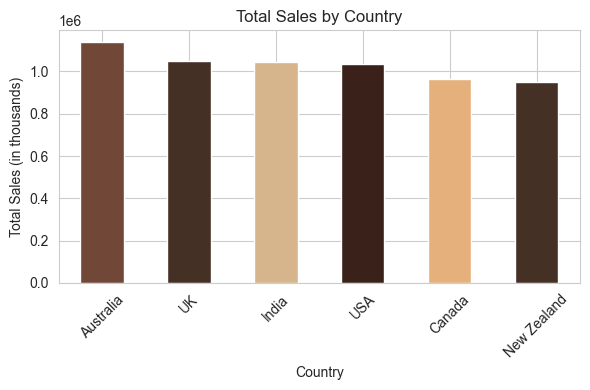

In [8]:
custom_palette = ['#714737','#443025','#D6B58C','#3A211A','#E5B07C','#443025']
# Visualize total sales by country
plt.figure(figsize=(6, 4))
total_sales_by_country.plot(kind='bar', color=custom_palette)
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales (in thousands)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Then we are going to calculate the Total Sales per Product

In [9]:
# Calculate total sales per product
total_sales_by_product = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)
total_sales_by_product

Product
Smooth Sliky Salty      349692.0
50% Dark Bites          341712.0
White Choc              329147.0
Peanut Butter Cubes     324842.0
Eclairs                 312445.0
99% Dark & Pure         299796.0
85% Dark Bars           299229.0
Organic Choco Syrup     294700.0
Spicy Special Slims     293454.0
Mint Chip Choco         283969.0
Almond Choco            277536.0
Manuka Honey Choco      275541.0
Milk Bars               269248.0
Raspberry Choco         264740.0
After Nines             261331.0
Fruit & Nut Bars        259147.0
Drinking Coco           256655.0
Orange Choco            256144.0
Baker's Choco Chips     249613.0
Choco Coated Almonds    241486.0
Caramel Stuffed Bars    231588.0
70% Dark Bites          211610.0
Name: Amount, dtype: float64

Checking top 5 products with highesh sales

In [10]:
total_sales_by_product.head()

Product
Smooth Sliky Salty     349692.0
50% Dark Bites         341712.0
White Choc             329147.0
Peanut Butter Cubes    324842.0
Eclairs                312445.0
Name: Amount, dtype: float64

Doing basic visulaisation for Top 5 Products with high total sales


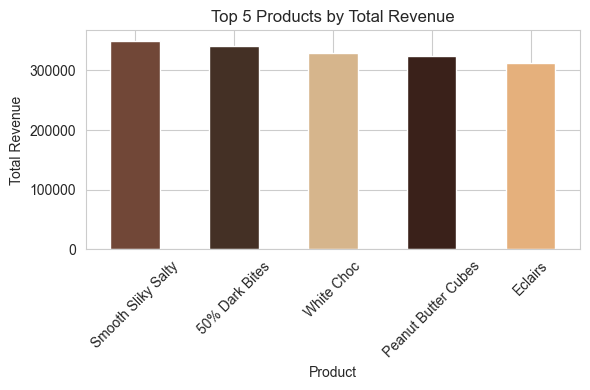

In [11]:
top_products = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(5)

# Plot Top 5 Products
plt.figure(figsize=(6, 4))
top_products.plot(kind='bar', color=custom_palette[:5])
plt.title('Top 5 Products by Total Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Calculating sales by Product Category

In [12]:
total_sales_by_category = df.groupby('Product Category')['Amount'].sum().sort_values(ascending=False)
total_sales_by_category

Product Category
Flavored Chocolate        1864583.0
Specialty Chocolate       1724436.0
Dark Chocolate            1152347.0
Nut-based Chocolate        843864.0
Milk & White Chocolate     598395.0
Name: Amount, dtype: float64

Calculate Percentage of Total Sales by Product Category


In [13]:
total_sales_by_category_percentage = np.round((total_sales_by_category / total_sales_by_category.sum()) * 100)
total_sales_by_category_percentage

Product Category
Flavored Chocolate        30.0
Specialty Chocolate       28.0
Dark Chocolate            19.0
Nut-based Chocolate       14.0
Milk & White Chocolate    10.0
Name: Amount, dtype: float64

Doing a baic visualization for Total Sales by Product Category


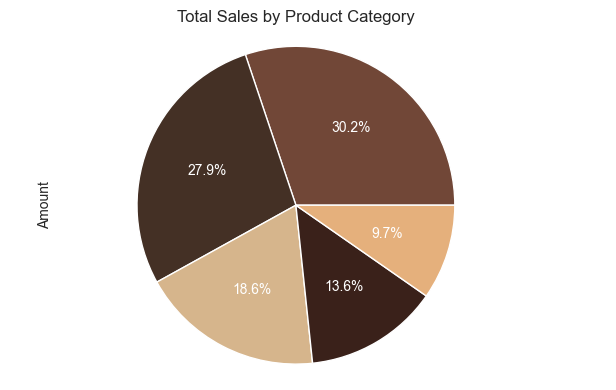

In [14]:
plt.figure(figsize=(6, 4))
total_sales_by_category.plot(kind='pie', autopct='%1.1f%%', colors=custom_palette, textprops={'color': 'white'})
plt.title('Total Sales by Product Category')
plt.axis('equal')
plt.tight_layout()
plt.show()

Conducting a Revenue per Box Shipped Analysis

We are then comparing the Boxes Shipped per Country and Product Category by creating a stacked bar chart

Product Category  Dark Chocolate  Flavored Chocolate  Milk & White Chocolate  \
Country                                                                        
Australia                   7835                9186                    3331   
Canada                      4641               10549                    1530   
India                       5787                9072                    2698   
New Zealand                 4329                9274                    2602   
UK                          5302                8481                    4180   
USA                         5833                9413                    2229   

Product Category  Nut-based Chocolate  Specialty Chocolate  
Country                                                     
Australia                        3979                 8316  
Canada                           4500                10001  
India                            4069                 7844  
New Zealand                      2886                 

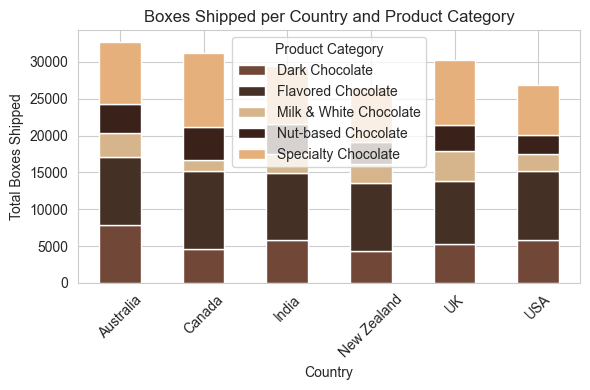

In [17]:
boxes_country_category = df.groupby(['Country', 'Product Category'])['Boxes Shipped'].sum().unstack()
print (boxes_country_category)
# Plot Boxes Shipped per Country and Product Category
boxes_country_category.plot(kind='bar', stacked=True, figsize=(6, 4), color=custom_palette)
plt.title('Boxes Shipped per Country and Product Category')
plt.xlabel('Country')
plt.ylabel('Total Boxes Shipped')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

Calcuating the Boxes Shipped per Product Category using bar chart


Boxes Shipped per Product Category:
Product Category
Flavored Chocolate        55975
Specialty Chocolate       49231
Dark Chocolate            33727
Nut-based Chocolate       21504
Milk & White Chocolate    16570
Name: Boxes Shipped, dtype: int64


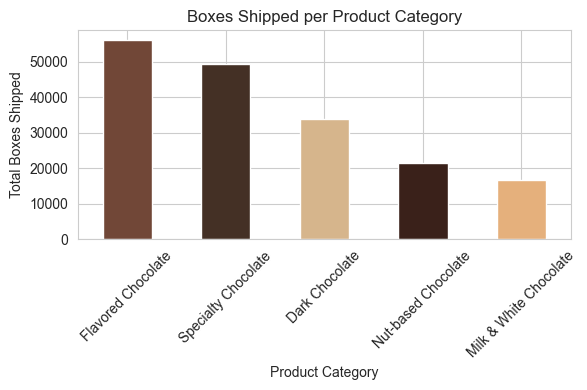

In [18]:
boxes_per_category = df.groupby('Product Category')['Boxes Shipped'].sum().sort_values(ascending=False)
print("\nBoxes Shipped per Product Category:")
print(boxes_per_category)

# Plot Boxes Shipped per Product Category
plt.figure(figsize=(6, 4))
boxes_per_category.plot(kind='bar', color=custom_palette)
plt.title('Boxes Shipped per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Boxes Shipped')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2 style='color:#714737;'> Advance Statistical Data Analysis</h2>

We are going to do a new summary statistics to find mean, median and standard deviation of Amount, Boxes Shipped, and Revenue per Box Shipped

In [19]:
summary_stats = np.round(df[['Amount', 'Boxes Shipped', 'Revenue per Box Shipped']].agg(['mean', 'median', 'std'])).T
summary_stats

,mean,median,std
Amount,5652.0,4868.0,4102.0
Boxes Shipped,162.0,135.0,122.0
Revenue per Box Shipped,106.0,36.0,279.0


We are going to check the Sales Trends Over Time

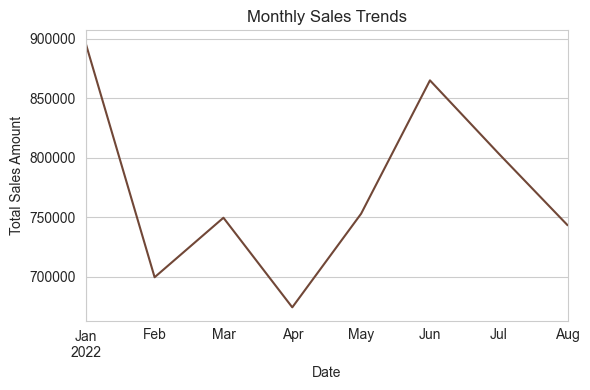

In [20]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample the data by month and calculate the total sales amount for each month
monthly_sales = df['Amount'].resample('M').sum()

# Plot the monthly sales trends
plt.figure(figsize=(6, 4))
monthly_sales.plot(color='#714737')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

Correlation between Sales Amount and Boxes Shipped: -0.018826853675834216


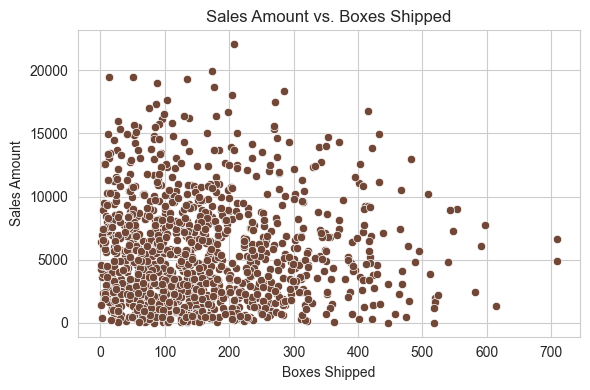

In [21]:
# Calculate the correlation between Sales Amount and Boxes Shipped
correlation = df['Amount'].corr(df['Boxes Shipped'])
print(f"Correlation between Sales Amount and Boxes Shipped: {correlation}")

# Plot the relationship between Sales Amount and Boxes Shipped
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Boxes Shipped', y='Amount', data=df, color='#714737')
plt.title('Sales Amount vs. Boxes Shipped')
plt.xlabel('Boxes Shipped')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

Then we will check the product performance distribution

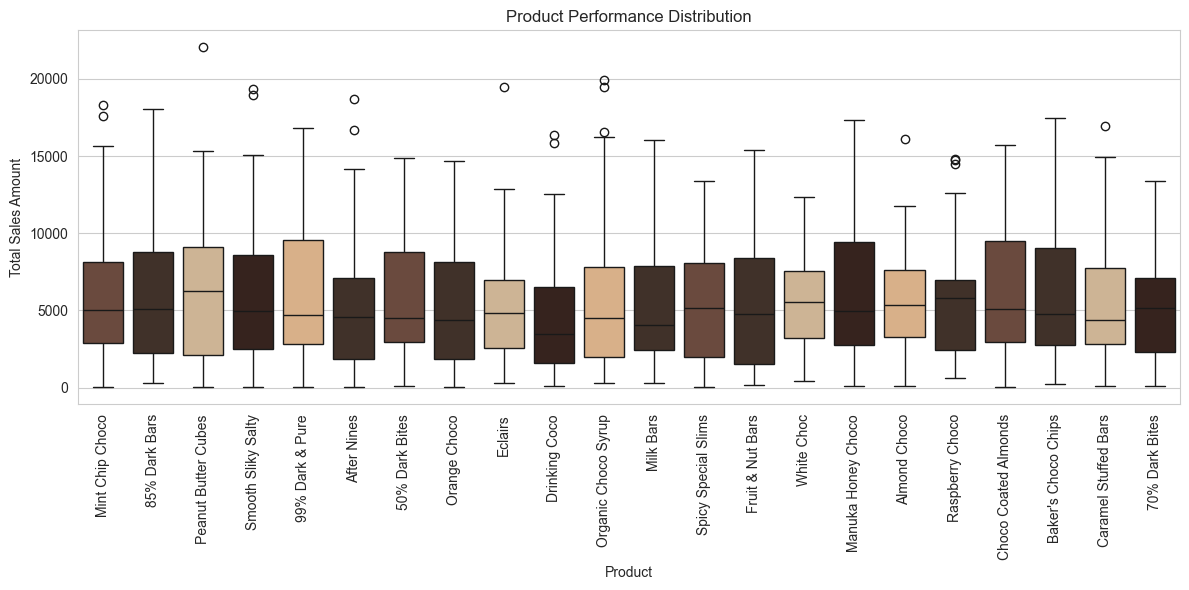

In [24]:
# Plot the distribution of total sales for each product
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='Amount', data=df, palette=custom_palette)
plt.title('Product Performance Distribution')
plt.xlabel('Product')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<div style='background-color:#714737; padding: 15px; border-radius: 5px;'>
<h2 style='color:#FEFEFE; text-align:center;'>Conclusion & Next Step</h2>
</div>

**Key Findings**


**1. Summary Statistics (Sales & Shipments)**

- Average Sales Amount per Transaction: $5,652.31
- Standard Deviation of Sales: $4,102.44 (indicating high variability)
- Minimum Sale: $7.00 | Maximum Sale: $22,050.00
- Median Sales Amount: $4,868.50
- Average Boxes Shipped per Transaction: 161.8


**2. Correlation Analysis**

- Sales Amount vs. Boxes Shipped: -0.0188 (Weak Negative Correlation). This suggests that increasing the number of boxes shipped does not strongly impact total revenue. Some high-revenue sales may involve fewer boxes but premium-priced chocolates


**3. Top 5 Countries by Total Sales Revenue**

- Australia – $1,137,367, UK – $1,051,792, India – $1,045,800, USA – $1,035,349 and Canada – $962,899
- Australia leads in total sales, followed closely by the UK and India
- India’s high sales suggest strong demand despite potentially different market dynamics


**4. Top 5 Best-Selling Chocolate Products**

- Smooth Silky Salty – $349,692, 50% Dark Bites – $341,712, White Choc – $329,147, Peanut Butter Cubes – $324,842, Eclairs – $312,445
- Dark chocolate & peanut butter varieties perform well, suggesting a preference for premium or unique flavors
- Smooth Silky Salty is the best-selling product, potentially due to unique taste or marketing strategies


**5. Monthly Sales Trend (First 5 Months of 2022)**

- January 2022: $896,105, February 2022: $699,377, March 2022: $749,483, April 2022: $674,051, May 2022: $752,892
- January has the highest sales (possibly due to post-holiday chocolate purchases)
- Sales drop in February and April, suggesting potential seasonality effects
- Sales increase in June again, maybe due to summer holidays